<a href="https://colab.research.google.com/github/Hebaallah61/AI_Project_objectdetection/blob/main/cnn5models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from keras import models,layers
import keras

In [9]:
#lenet
class LeNet(models.Sequential):
  def init(self,input_shape,nb_classes): #function called initiate
    super().__int__()
#self.add==model.add but because its very old
    self.add(layers.Conv2D(6, kernel_size(5,5), strides=(1,1), activation='tanh', input_shape=input_shape,padding="same"))
    self.add(layers.AveragePooling2D(pool_size(2,2), strides=(1,1), padding="same"))
    self.add(layers.Conv2D(16,kernal_size(5,5), strides=(1,1), activation='tanh', padding="valid"))
    self.add(layers.AveragePooling2D(pool_size(2,2), strides=(2,2),  padding="valid"))
    self.add(layers.Conv2D(120,kernal_size(5,5), strides=(1,1), activation='tanh', padding="valid"))
    self.add(layers.Flatten())
    self.add(layers.Dense(84,activation='tanh'))
    self.add(layers.Dense(nb_classes,activation='softmax'))
    self.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD')
    self.summery()

In [14]:
#alexnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Activation,Dropout,Flatten 
from keras.layers.normalization import batch_normalization
import numpy as np
np.random.seed(1000)
#instantiate empty model

model=Sequential()


#1st layer

model.add(Conv2D(filters=96,input_shape=(224,244,3),kernel_size=(11,11),strides=(4,4),padding='valid'))
model.add(Activation('relu'))
#max pool
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#2nd layer

model.add(Conv2D(filters=256, kernel_size=(11,11),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#max pool
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#3rd layer

model.add(Conv2D(filters=384, kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#4th layer
model.add(Conv2D(filters=384, kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))

#5th layer
model.add(Conv2D(filters=256, kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
#max pool
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

#pass it to a fully connected layer
model.add(Flatten())

#1st fully conected layer
model.add(Dense(4096,input_shape=(224*224*3,)))
model.add(Activation('relu'))

#add dropout to prevent overfitting
model.add(Dropout(0.4))

#2nd fully connected layer

model.add(Dense(4096))
model.add(Activation('relu'))

#add dropout
model.add(Dropout(0.4))

#3rd fully connected layer
model.add(Dense(1000))
model.add(Activation('relu'))

#add dropout
model.add(Dropout(0.4))


#output layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

#compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 54, 59, 96)        34944     
                                                                 
 activation_7 (Activation)   (None, 54, 59, 96)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 29, 96)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 17, 19, 256)       2973952   
                                                                 
 activation_8 (Activation)   (None, 17, 19, 256)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 9, 256)        0         
 2D)                                                  

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 256, 256, 64)      1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 128)     147584    
                                                             

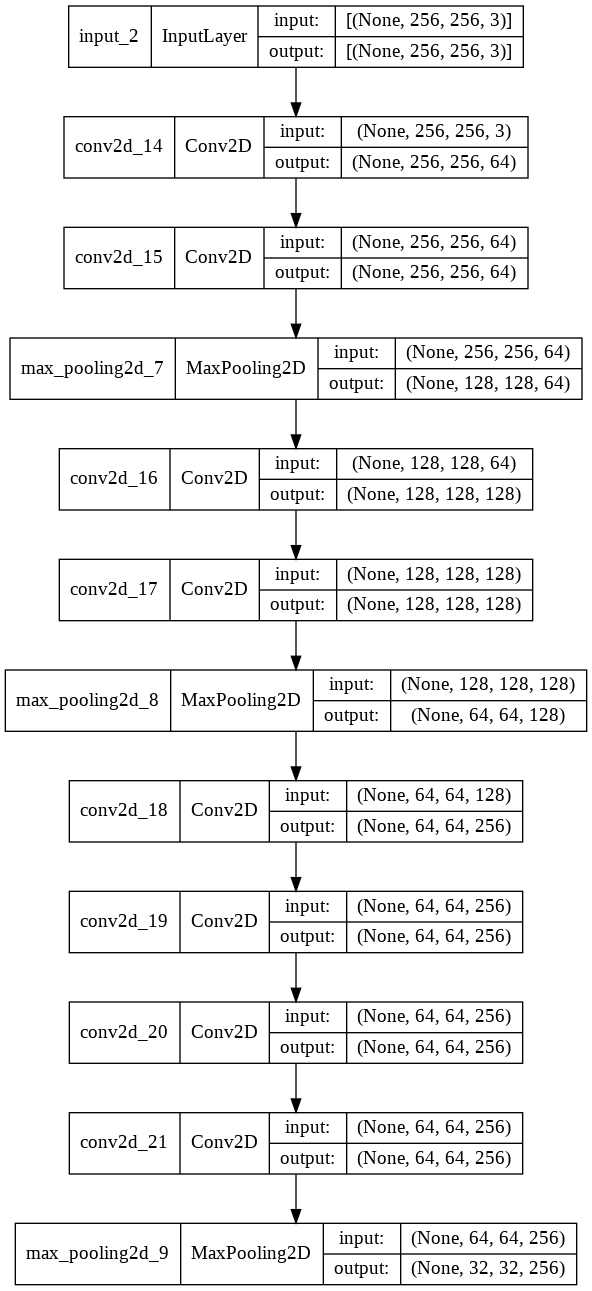

In [30]:
#vgg
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils.vis_utils import plot_model


#function for creating vgg block
def vgg_block(layer_in, n_filters, n_conv):
   #add conv layers
   for _ in range(n_conv):
     layer_in=Conv2D(n_filters,(3,3),padding='same',activation='relu')(layer_in)
  #add max pooling layer
   layer_in= MaxPooling2D((2,2), strides=(2,2))(layer_in)
   return layer_in

#define model input 
visible=Input(shape=(256,256,3))
#add vgg modules
layer=vgg_block(visible,64,2)
#add vgg modules
layer=vgg_block(layer,128,2)
#add vgg modules
layer=vgg_block(layer,256,4)
#create model
model=Model(inputs=visible,outputs=layer)
#summaries model
model.summary()
#plot model architecture
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 256, 256, 64  256         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 256, 256, 12  3584        ['input_3[0][0]']                
                                8)                                                          

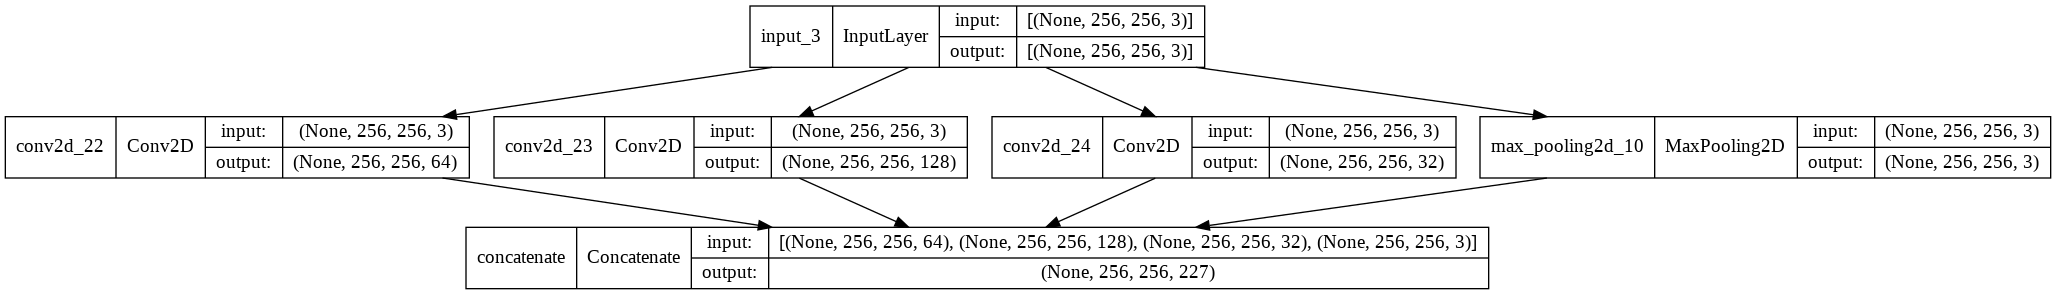

In [31]:
#inception 
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate 
from keras.utils.vis_utils import plot_model

#function for create naive inception block

def naive_inception_module(layer_in, f1, f2, f3):
  #1*1 conv
  conv1=Conv2D(f1,(1,1), padding='same', activation='relu')(layer_in)
  #3*3 conv
  conv3=Conv2D(f2,(3,3), padding='same', activation='relu')(layer_in)
  #5*5
  conv5=Conv2D(f3,(5,5), padding='same', activation='relu')(layer_in)
  #3*3 maxpooling
  pool= MaxPooling2D((3,3),strides=(1,1),padding='same')(layer_in)
  #concatenate filters, assumes filters/channels last
  layer_out= concatenate([conv1,conv3,conv5,pool],axis=-1)
  return layer_out

#define model input
visible=Input(shape=(256,256,3))
#add inception module
layer=naive_inception_module(visible,64, 128 ,32)
#create model
model=Model(inputs=visible,outputs=layer)
#summerize model
model.summary()
#plot model architecture
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_32 (Conv2D)             (None, 256, 256, 12  512         ['input_5[0][0]']                
                                8)                                                                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 256, 256, 32  128         ['input_5[0][0]']                
                                )                                                           

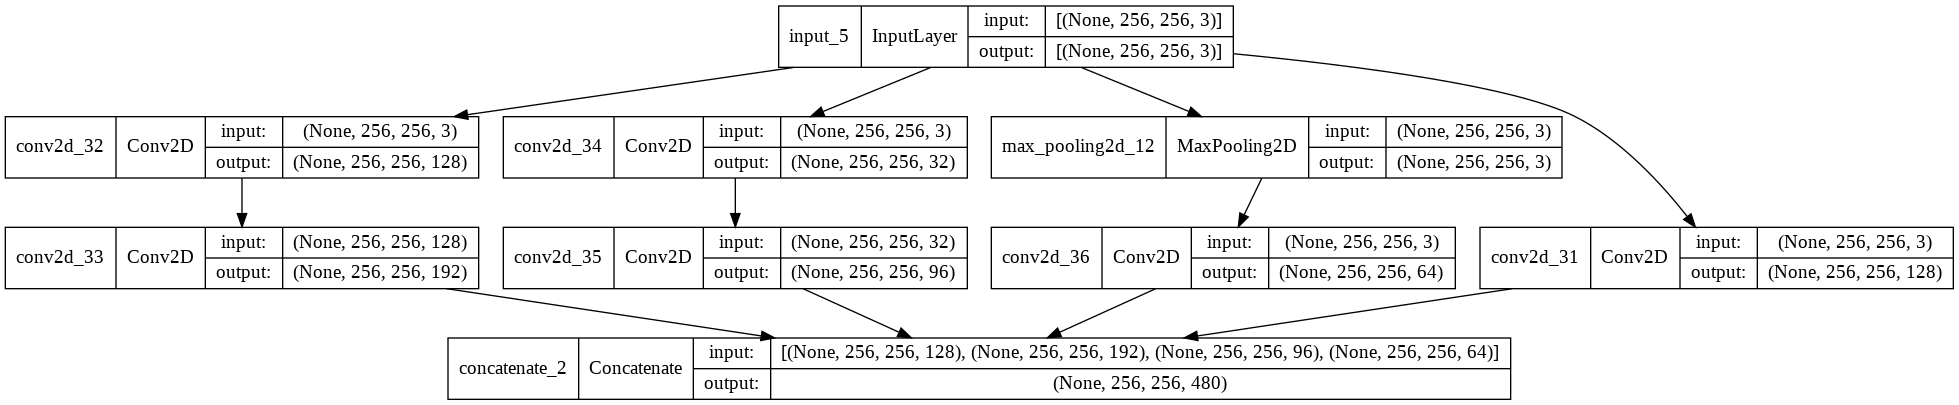

In [33]:
#advance from naive inception more power 
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate 
from keras.utils.vis_utils import plot_model

#function for create naive inception block

def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out,f4_out):
  #1*1 conv
  conv1=Conv2D(f1,(1,1), padding='same', activation='relu')(layer_in)
  #3*3 conv
  conv3=Conv2D(f2_in,(1,1), padding='same', activation='relu')(layer_in)
  conv3=Conv2D(f2_out,(3,3), padding='same', activation='relu')(conv3)
  #5*5
  conv5=Conv2D(f3_in,(1,1), padding='same', activation='relu')(layer_in)
  conv5=Conv2D(f3_out,(5,5), padding='same', activation='relu')(conv5)
  #3*3 maxpooling
  pool= MaxPooling2D((3,3),strides=(1,1),padding='same')(layer_in)
  pool= Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
  #concatenate filters, assumes filters/channels last
  layer_out= concatenate([conv1,conv3,conv5,pool],axis=-1)
  return layer_out

#define model input
visible=Input(shape=(256,256,3))
#add inception block1
layer=inception_module(visible,64, 96, 128, 16, 32, 32)
#add inception block1
layer=inception_module(visible, 128, 128, 192, 32, 96, 64)
#create model
model=Model(inputs=visible,outputs=layer)
#summerize model
model.summary()
#plot model architecture
plot_model(model, show_shapes=True, to_file='inception_module.png')


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_41 (Conv2D)             (None, 256, 256, 64  1792        ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_42 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_41[0][0]']              
                                )                                                           

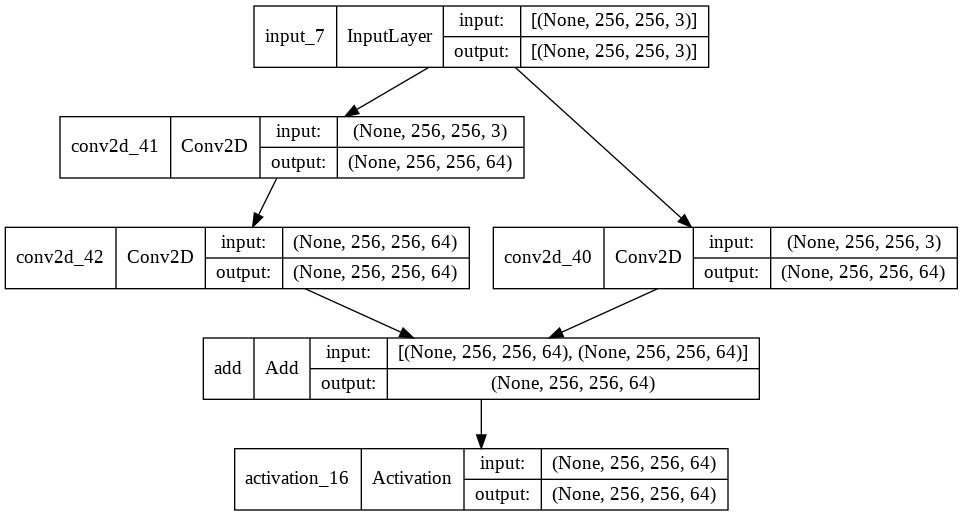

In [35]:
#resnet
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils.vis_utils import plot_model

#func create projecrtion residual module
def residual_module(layer_in, n_filters):
  merge_input= layer_in
  #check number of filters needs to be increase assumes channels last format
  if layer_in.shape[-1] != n_filters:
    merge_input=Conv2D(n_filters, (1,1), padding='same', activation='relu',kernel_initializer='he_normal')(layer_in)
  #conv1
  conv1=Conv2D(n_filters,(3,3),padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  #conv2
  conv2=Conv2D(n_filters,(3,3),padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
  #add filters assume filters/channels last
  layer_out= add([conv2, merge_input])
  #activation fun
  layer_out = Activation('relu')(layer_out)
  return layer_out

#define model input
visible=Input(shape=(256,256,3))
#add resnet module
layer=residual_module(visible, 64)
#create model
model=Model(inputs=visible,outputs=layer)
#summerize model
model.summary()
#plot model architecture
plot_model(model, show_shapes=True, to_file='residual_module.png')




49152/35363 [=========================================] - 0s 0us/step
sports_car(72.96%)


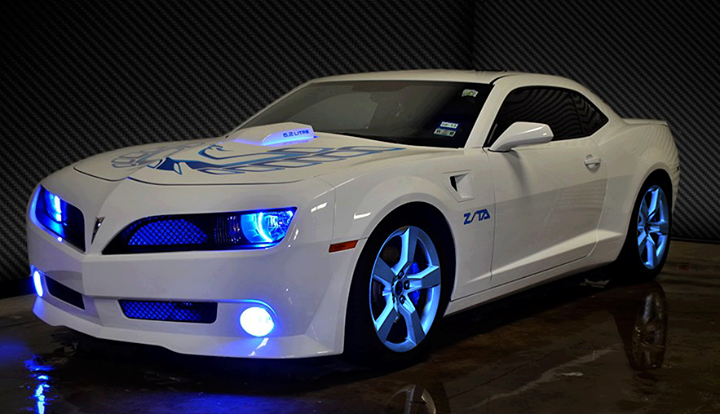

In [40]:
#example using vgg16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import  VGG16
from keras .applications.vgg16 import decode_predictions


#load an img from file 
img=load_img('/content/car.png', target_size=(224,224))
#convert the img pixel to numpy array
img=img_to_array(img)
#reshape data for the model
img=img.reshape((1,img.shape[0], img.shape[1], img.shape[2]))
#prepare the img for vgg model
img=preprocess_input(img)
#load the model
model=VGG16()
#predict probability across all output classes
yhat= model.predict(img)
#convert probability to class labels
label= decode_predictions(yhat)
#retrive most like result highest prob
label= label[0][0]
#print the classification
print('%s(%.2f%%)'% (label[1], label[2]*100))
from IPython.display import  Image
Image('/content/car.png')
Image('/content/car.png', width=224, height=224)


